In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


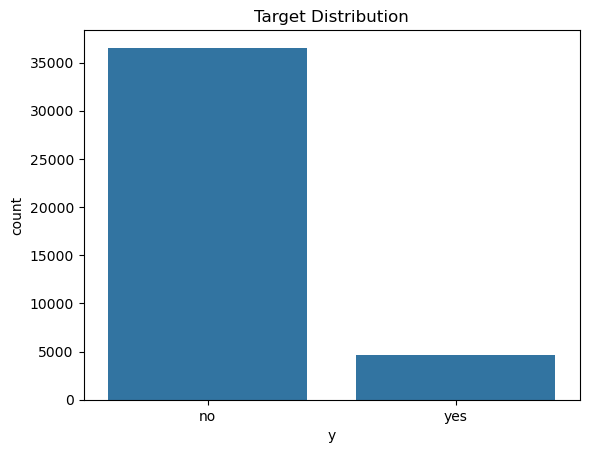

In [13]:
df['y'].value_counts()
df['y'].value_counts(normalize=True)

sns.countplot(x='y', data=df)
plt.title("Target Distribution")
plt.show()


job job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
Name: count, dtype: int64


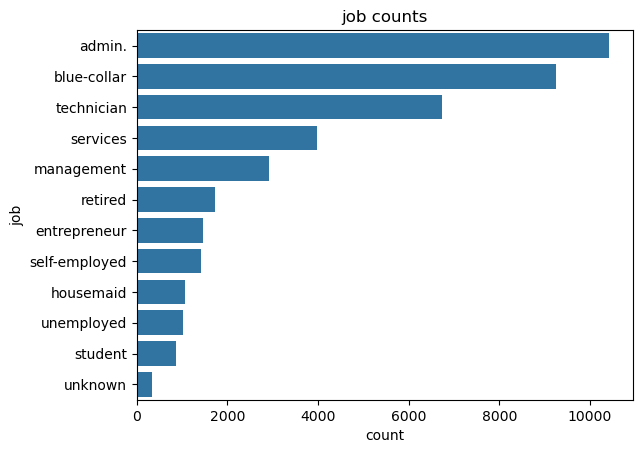

marital marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


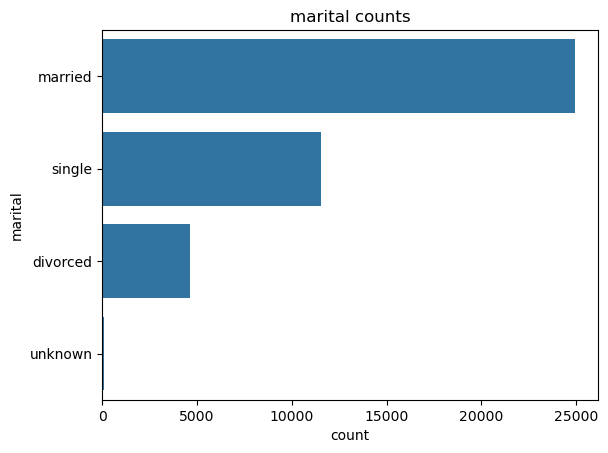

education education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


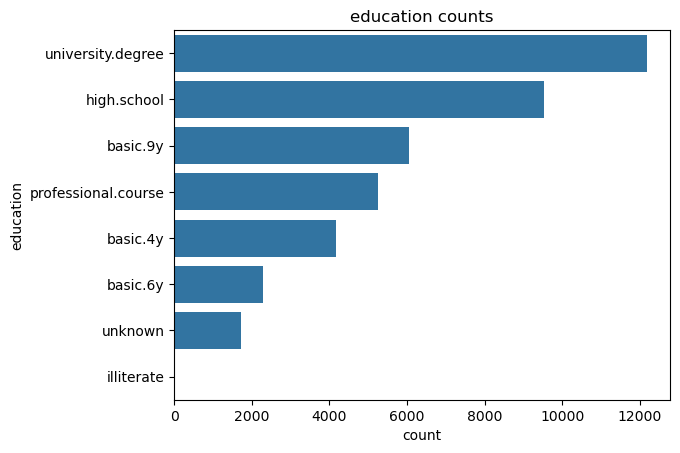

housing housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


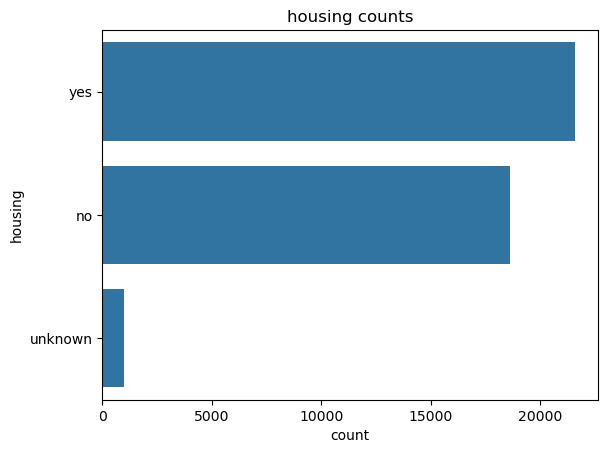

loan loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


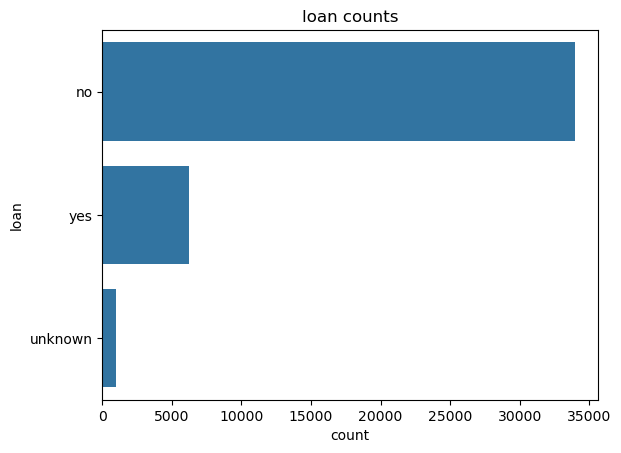

poutcome poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64


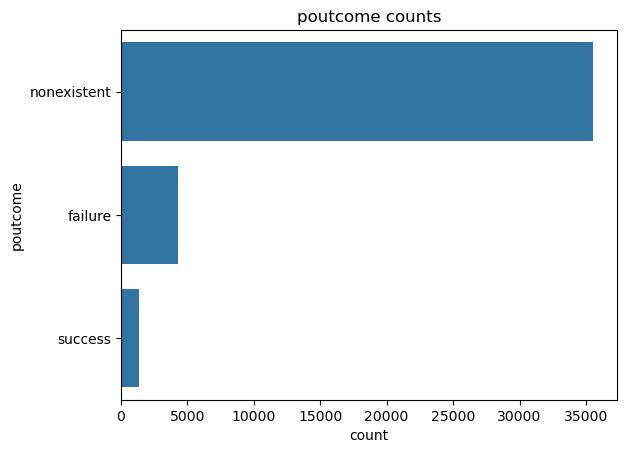

In [15]:
for col in ['job','marital','education','housing','loan','poutcome']:
    print(col, df[col].value_counts().head(10))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col} counts')
    plt.show()


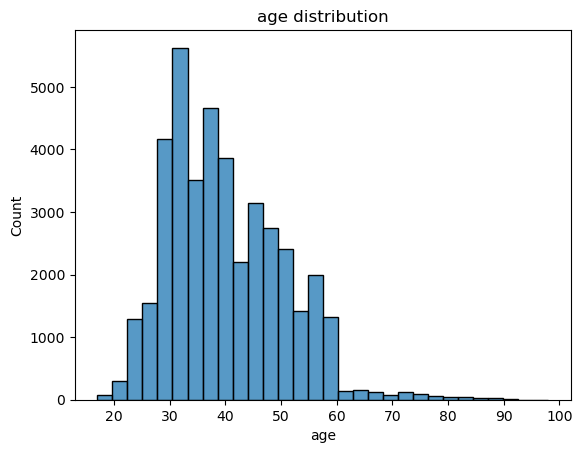

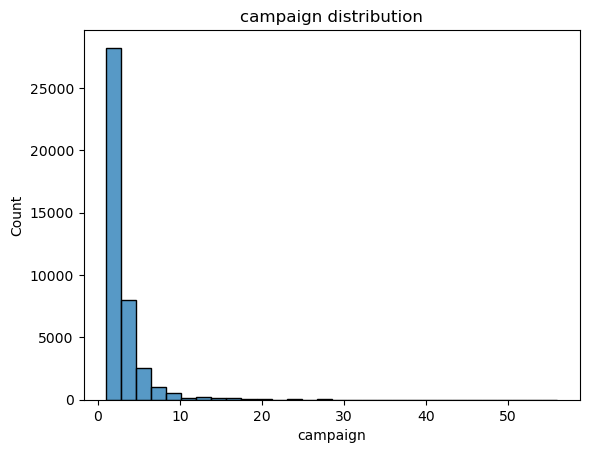

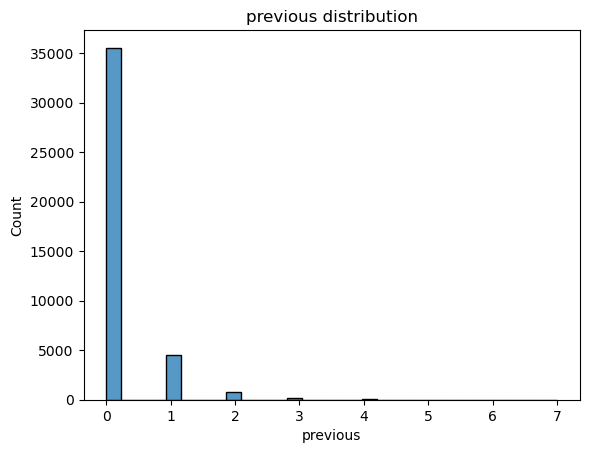

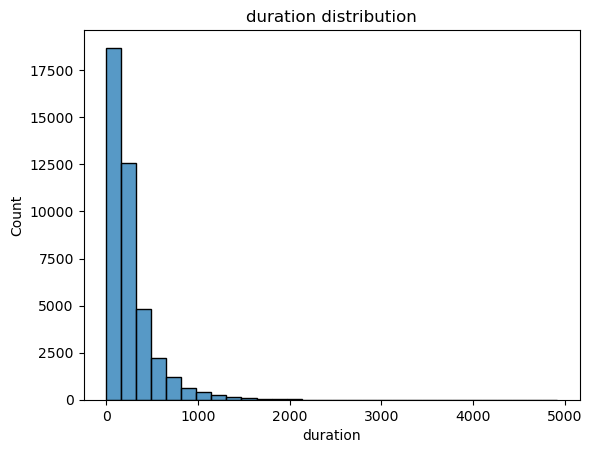

In [17]:
num_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df[num_cols].describe()

for col in ['age','campaign','previous','duration']:
    sns.histplot(data=df, x=col, bins=30)
    plt.title(f'{col} distribution')
    plt.show()


In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [23]:
from sklearn import preprocessing

colname=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','y']

le=preprocessing.LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])
    

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
x = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype(int)

In [29]:
x.shape

(41188, 20)

In [31]:
y.shape

(41188,)

In [39]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=300)

model_rf.fit(x_train,y_train)

y_pred_rf = model_rf.predict(x_test)

print (y_pred_rf)

[0 0 0 ... 0 0 0]


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print("confusion matrix \n", confusion_matrix(y_test,y_pred_rf))
print("accuracy score:", accuracy_score(y_test,y_pred_rf))
print("classification report: \n", classification_report(y_test,y_pred_rf))

confusion matrix 
 [[7019  262]
 [ 447  510]]
accuracy score: 0.9139354212187424
classification report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7281
           1       0.66      0.53      0.59       957

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



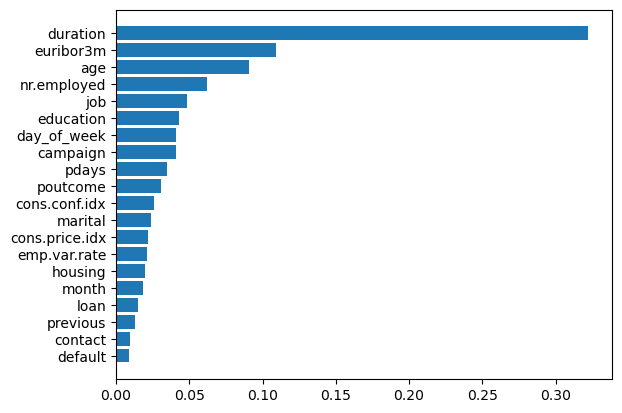

In [43]:
f_i = list(zip(df.columns[0:-1],model_rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [45]:
df.drop(columns=['default'],axis=1,inplace=True)


In [47]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### After the default column is removed, splitting the data into the train and test dataset

In [50]:
x = df.values[:,:-1]
y = df.values[:,-1]
y = y.astype(int)

### Now scaling the data using Standard scaler so that the further predictions can be made

In [53]:
scaler = StandardScaler()

scaler.fit_transform(x)


array([[ 1.53303429, -0.20157925, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.46762984, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [55]:
print(x)

[[ 5.6000e+01  3.0000e+00  1.0000e+00 ... -3.6400e+01  4.8570e+00
   5.1910e+03]
 [ 5.7000e+01  7.0000e+00  1.0000e+00 ... -3.6400e+01  4.8570e+00
   5.1910e+03]
 [ 3.7000e+01  7.0000e+00  1.0000e+00 ... -3.6400e+01  4.8570e+00
   5.1910e+03]
 ...
 [ 5.6000e+01  5.0000e+00  1.0000e+00 ... -5.0800e+01  1.0280e+00
   4.9636e+03]
 [ 4.4000e+01  9.0000e+00  1.0000e+00 ... -5.0800e+01  1.0280e+00
   4.9636e+03]
 [ 7.4000e+01  5.0000e+00  1.0000e+00 ... -5.0800e+01  1.0280e+00
   4.9636e+03]]


In [57]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)
x_test

array([[ 5.7000e+01,  9.0000e+00,  1.0000e+00, ..., -4.6200e+01,
         1.2990e+00,  5.0991e+03],
       [ 5.5000e+01,  1.1000e+01,  1.0000e+00, ..., -3.6400e+01,
         4.8600e+00,  5.1910e+03],
       [ 3.3000e+01,  1.0000e+00,  1.0000e+00, ..., -4.6200e+01,
         1.3130e+00,  5.0991e+03],
       ...,
       [ 4.6000e+01,  2.0000e+00,  2.0000e+00, ..., -4.7100e+01,
         1.4050e+00,  5.0991e+03],
       [ 3.1000e+01,  0.0000e+00,  2.0000e+00, ..., -4.2700e+01,
         4.9630e+00,  5.2281e+03],
       [ 5.9000e+01,  0.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8550e+00,  5.1910e+03]])

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


model_AdaBoost=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                  n_estimators=10)
model_AdaBoost.fit(x_train,y_train)
y_pred_adb=model_AdaBoost.predict(x_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [61]:
print("Confusion Matrix: \n" , confusion_matrix(y_test,y_pred_adb))
print("Accuracy Score:", accuracy_score(y_test,y_pred_adb))
print("Classification Report: \n", classification_report(y_test,y_pred_adb))

Confusion Matrix: 
 [[6845  458]
 [ 443  492]]
Accuracy Score: 0.8906287933964554
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.52      0.53      0.52       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



In [63]:
# predicting using the Kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(x_train))),
                               metric='minkowski')

model_KNN.fit(x_train,y_train)

y_pred_KNN=model_KNN.predict(x_test)

In [65]:
print("Confusion Matrix: \n" , confusion_matrix(y_test,y_pred_KNN))
print("Accuracy Score:", accuracy_score(y_test,y_pred_KNN))
print("Classification Report: \n", classification_report(y_test,y_pred_KNN))

Confusion Matrix: 
 [[7058  245]
 [ 474  461]]
Accuracy Score: 0.9127215343529983
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.65      0.49      0.56       935

    accuracy                           0.91      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [67]:
from sklearn.svm import SVC

In [69]:
svc_model=SVC(kernel='rbf',C=1)

svc_model.fit(x_train, y_train)
Y_pred_svc=svc_model.predict(x_test)

In [71]:
print("Confusion Matrix: \n" , confusion_matrix(y_test,Y_pred_svc))
print("Accuracy Score:", accuracy_score(y_test,Y_pred_svc))
print("Classification Report: \n", classification_report(y_test,Y_pred_svc))

Confusion Matrix: 
 [[7176  127]
 [ 742  193]]
Accuracy Score: 0.8945132313668366
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.60      0.21      0.31       935

    accuracy                           0.89      8238
   macro avg       0.75      0.59      0.63      8238
weighted avg       0.87      0.89      0.87      8238



In [73]:
results = []
for name, y_pred in [
    ("Adaboost Classifier", y_pred_adb),
    ("KNN", y_pred_KNN),
    ("SVC", Y_pred_svc)
]:
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)

display(results_df)


,Model,Accuracy,Precision,Recall,F1 Score
0,Adaboost Classifier,0.890629,0.517895,0.526203,0.522016
1,KNN,0.912722,0.652975,0.493048,0.561853
2,SVC,0.894513,0.603125,0.206417,0.307570


### 